# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [26]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Read the Mapbox API key
load_dotenv()
mapbox_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [50]:
# Read the census data into a Pandas DataFrame
sfo_data_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(sfo_data_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [29]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_housing_units_per_year = sfo_data['housing_units'].groupby('year').mean()
avg_housing_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

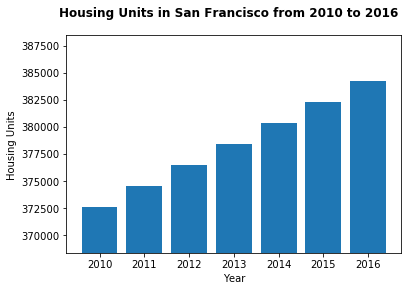

In [30]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

min_units = min(avg_housing_units_per_year)
max_units = max(avg_housing_units_per_year)
std_units = avg_housing_units_per_year.std()

plt.bar(
    avg_housing_units_per_year.index,
    avg_housing_units_per_year,
)
plt.ylim(
    (min_units - std_units),
    (max_units + std_units)
)
plt.suptitle(
    'Housing Units in San Francisco from 2010 to 2016',
    weight='bold'
)
plt.xlabel('Year')
plt.ylabel('Housing Units')
plt.show()
plt.close()

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [31]:
# Calculate the average sale price per square foot and average gross rent
sales_rent = round(sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean(),2)
sales_rent

,sale_price_sqr_foot,gross_rent
year,,
2010,369.34,1239
2011,341.90,1530
2012,399.39,2324
2013,483.60,2971
2014,556.28,3528
2015,632.54,3739
2016,697.64,4390


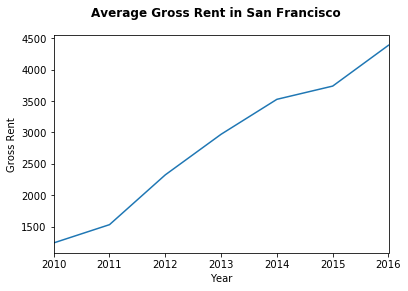

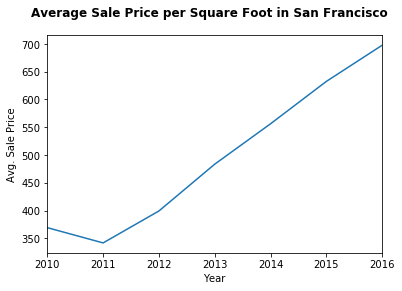

In [51]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
plt.plot(
    sales_rent.index, 
    sales_rent['gross_rent']
)
plt.xlim(
    sales_rent.index[0],
    sales_rent.index[-1]
)
plt.suptitle(
    'Average Gross Rent in San Francisco',
    weight='bold'
)
plt.xlabel('Year')
plt.ylabel('Gross Rent')
plt.show()
plt.close()


# Line chart for average montly rent
plt.plot(
    sales_rent.index, 
    sales_rent['sale_price_sqr_foot']
)
plt.xlim(
    sales_rent.index[0],
    sales_rent.index[-1]
)
plt.suptitle(
    'Average Sale Price per Square Foot in San Francisco', 
    weight='bold'
)
plt.xlabel('Year')
plt.ylabel('Avg. Sale Price')
plt.show()
plt.close()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [33]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_df = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_df.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [36]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_df['sale_price_sqr_foot'].hvplot(
    xlabel='Year',
    ylabel='Average price per square foot',
    label=' ',
    groupby='neighborhood',
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [35]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_df['gross_rent'].hvplot(
    xlabel='Year',
    ylabel='Average monthly rent',
    label=' ',
    groupby='neighborhood',
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [11]:
# Getting the data from the top 10 expensive neighborhoods to own
top_10_most_expensive = sfo_data.groupby('neighborhood').mean().sort_values(ascending=False, by='sale_price_sqr_foot')

In [23]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_most_expensive['sale_price_sqr_foot'].head(10).hvplot.bar(
    ylabel='Average sale price per square foot',
    xlabel='Neighborhood',
    label='Top 10 Most Expensive Neighborhoods',
    rot=30,
    height=300,
    width=600,
) 

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [40]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_df.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [41]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_df.hvplot.bar(x= 'year', y=['sale_price_sqr_foot', 'gross_rent'], groupby= 'neighborhood')

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [46]:
# Load neighborhoods coordinates data
locations_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_locations_df = pd.read_csv(locations_path)
neighborhood_locations_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [47]:
# Calculate the mean values for each neighborhood
neighborhoods = sfo_data.groupby(by="neighborhood").mean()
neighborhoods.reset_index(inplace=True)
neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
neighborhoods.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [48]:
# Join the average values with the neighborhood locations
neighborhoods = pd.merge(
    neighborhood_locations_df, neighborhoods, on="Neighborhood"
)
neighborhoods.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

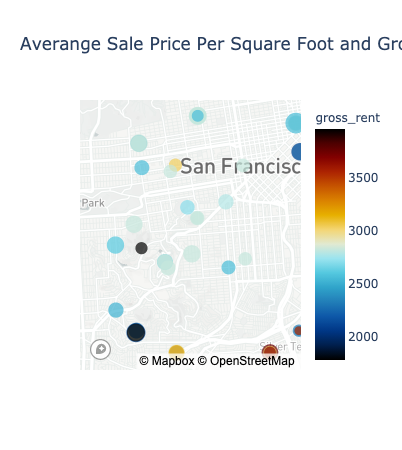

In [49]:
# Set the mapbox access token
px.set_mapbox_access_token(mapbox_api)

# Create a scatter mapbox to analyze neighborhood info
map = px.scatter_mapbox(
    neighborhoods,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)
map.show()